# Assignment 2
## Due April 30th

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Exercise 1

Here we define the function that will generate our data

In [2]:
def get_gaussian2d_data_with_labels(n1, n2):
    
    # This is to garantee that we all have the same data points
    np.random.seed(n1+n2)
    
    mu1 = [1, 1]
    var1 = [[0.2, 0],
            [0, 0.2]]
    
    mu2 = [3, 1]
    var2 = [[2, 0],
            [0, 2]]
    
    data = np.concatenate([np.random.multivariate_normal(mu1, var1, n1),
                           np.random.multivariate_normal(mu2, var2, n2)])
    
    labels = np.concatenate([np.repeat(1, n1),
                             np.repeat(2, n2)])
                           
    return data, labels  

## a)

Create train dataset and plot it

In [7]:
train_n1, train_n2 = 25, 25
train_data, train_labels = get_gaussian2d_data_with_labels(train_n1, train_n2)

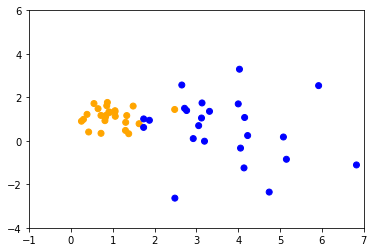

In [8]:
fig = plt.figure()
color = ['orange' if l == 1 else 'blue' for l in train_labels]
plt.scatter(train_data[:, 0], train_data[:, 1], c=color)
plt.xlim([-1, 7])
plt.ylim([-4, 6])
plt.show()

Create test dataset and plot it

In [ ]:
# test_n1, test_n2
# test_data, test_labels

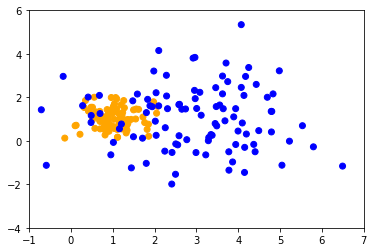

In [9]:
test_n1, test_n2 = 100, 100
test_data, test_labels  = get_gaussian2d_data_with_labels(test_n1, test_n2)

fig = plt.figure()
color = ['orange' if l == 1 else 'blue' for l in test_labels]
plt.scatter(test_data[:, 0], test_data[:, 1], c=color)
plt.xlim([-1, 7])
plt.ylim([-4, 6])
plt.show()

## b)

Define knn and predict with $k = 3$ and plot the result

In [82]:
def knnClassify(train_data, train_labels, test_data, k=1):
    pred_labels = []
    for testpoint in test_data:
        #Calculate the Euclidean distance
        #print(train_data.shape, testpoint.shape)
        dist = np.linalg.norm(train_data-testpoint, axis = -1)
        
        #Next sort the distances and based on that the labels
        distIndex = dist.argsort()
        sortedLabels = train_labels[distIndex]
        
        #Finally find the most common label in the k nearest subset:
        label = np.bincount(sortedLabels[0:k]).argmax()
        pred_labels.append(label)
    return(pred_labels)

In [83]:
pred_labels = knnClassify(train_data, train_labels, test_data, k=3)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2

## c)

Plot the correct predictions in black and the wrong one in red

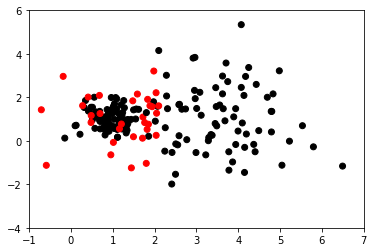

In [84]:
#Simple trick: If the true label is the same as the predicted one, the difference will be 0
correct_preds = ['black' if l == 0 else 'red' for l in (test_labels-pred_labels)]

fig = plt.figure()
plt.scatter(test_data[:, 0], test_data[:, 1], c=correct_preds)
plt.xlim([-1, 7])
plt.ylim([-4, 6])
plt.show()

## d)

define the empirical risk with 0-1-loss and compute the 0-1 loss for the labels predicted above

In [85]:
def empRiskWith01loss(test_labels, pred_labels):
    loss = [0 if l == 0 else 1 for l in (test_labels-pred_labels)] #-> sum up boolean isntead
    empRisk = sum(loss)/len(test_labels)
    return empRisk

In [86]:
empRiskWith01loss(test_labels, pred_labels)

0.155

Compute the risk for various k and plot it

<function matplotlib.pyplot.show(*args, **kw)>

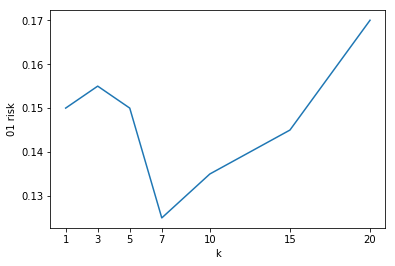

In [89]:
ks = [1, 3, 5, 7, 10, 15, 20]
ks_risk = []

for k in ks:
    pred_labels = knnClassify(train_data, train_labels, test_data, k)
    ks_risk.append(empRiskWith01loss(test_labels, pred_labels))

fig = plt.figure()
plt.plot(ks, ks_risk)
plt.ylabel("01 risk")
plt.xlabel("k")
plt.xticks(ks)
plt.show

### e)

Create train dataset with n1 = n2 = 500, plot it and repeat the same analysis as in d)

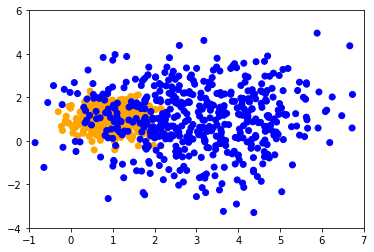

<function matplotlib.pyplot.show(*args, **kw)>

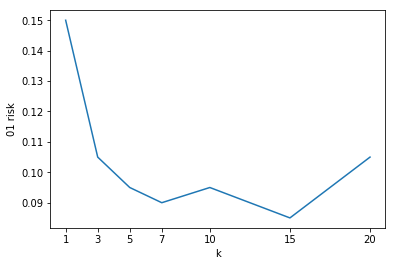

In [91]:
train_n1, train_n2 = 500, 500
train_data, train_labels = get_gaussian2d_data_with_labels(train_n1, train_n2)

fig = plt.figure()
color = ['orange' if l == 1 else 'blue' for l in train_labels]
plt.scatter(train_data[:, 0], train_data[:, 1], c=color)
plt.xlim([-1, 7])
plt.ylim([-4, 6])
plt.show()

ks = [1, 3, 5, 7, 10, 15, 20]
ks_risk = []

for k in ks:
    pred_labels = knnClassify(train_data, train_labels, test_data, k)
    ks_risk.append(empRiskWith01loss(test_labels, pred_labels))

fig = plt.figure()
plt.plot(ks, ks_risk)
plt.ylabel("01 risk")
plt.xlabel("k")
plt.xticks(ks)
plt.show

### f)

Create train dataset with n1 = n2 = 1000, plot it and repeat the same analysis as in d)

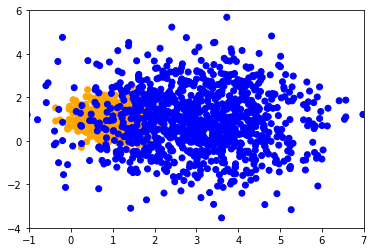

<function matplotlib.pyplot.show(*args, **kw)>

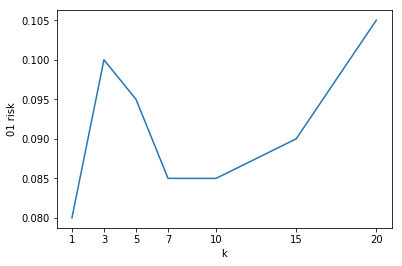

In [93]:
train_n1, train_n2 = 1000, 1000
train_data, train_labels = get_gaussian2d_data_with_labels(train_n1, train_n2)

fig = plt.figure()
color = ['orange' if l == 1 else 'blue' for l in train_labels]
plt.scatter(train_data[:, 0], train_data[:, 1], c=color)
plt.xlim([-1, 7])
plt.ylim([-4, 6])
plt.show()

ks = [1, 3, 5, 7, 10, 15, 20]
ks_risk = []

for k in ks:
    pred_labels = knnClassify(train_data, train_labels, test_data, k)
    ks_risk.append(empRiskWith01loss(test_labels, pred_labels))

fig = plt.figure()
plt.plot(ks, ks_risk)
plt.ylabel("01 risk")
plt.xlabel("k")
plt.xticks(ks)
plt.show

# Exercise 2
Load data and show one class

In [94]:
train_df = pd.read_csv('train_USPS.csv', sep='\t',)
train_data = train_df.drop(['Label'], axis=1).values
train_labels = train_df['Label'].values
test_df = pd.read_csv('test_USPS.csv', sep='\t')
test_data = test_df.drop(['Label'], axis=1).values
test_labels = test_df['Label'].values

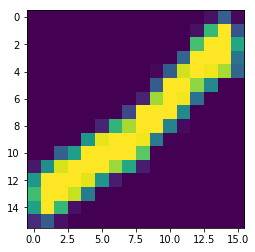

In [95]:
plt.imshow(train_data[3].reshape(16,16))

## a)

Find out if the dataset is balanced

In [100]:
print(np.bincount(train_labels.astype(np.int32)))

np.bincount(test_labels.astype(np.int32))    

[1000 1000 1000 1000 1000 1000 1000 1000 1000 1000]


array([100, 100, 100, 100, 100, 100, 100, 100, 100, 100], dtype=int32)

## b)

Compute knn for the USPS dataset

In [101]:
ks = range(1,20)

done with k =  1
done with k =  2
done with k =  3
done with k =  4
done with k =  5
done with k =  6
done with k =  7
done with k =  8
done with k =  9
done with k =  10
done with k =  11
done with k =  12
done with k =  13
done with k =  14
done with k =  15
done with k =  16
done with k =  17
done with k =  18
done with k =  19


<function matplotlib.pyplot.show(*args, **kw)>

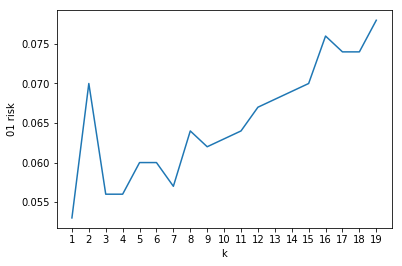

In [107]:
ks_risk = []

#The knnClassify as implemented above is not very efficient. However, it did not produce any runtime errors and was done
#in "only" 10 min on a good desktop computer

for k in ks:
    pred_labels = knnClassify(train_data, train_labels.astype(np.int32), test_data, k)
    ks_risk.append(empRiskWith01loss(test_labels, pred_labels))
    print("done with k = " ,k)

fig = plt.figure()
plt.plot(ks, ks_risk)
plt.ylabel("01 risk")
plt.xlabel("k")
plt.xticks(ks)
plt.show

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 7, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 8, 1, 2, 8, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 7, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 9, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 7, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 1, 4, 4, 4, 4, 1, 9, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 

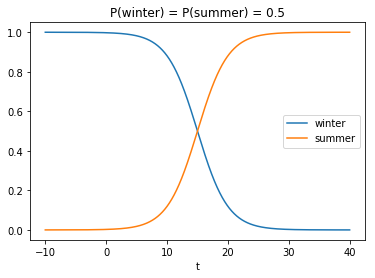

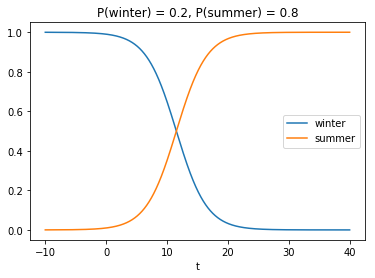

In [36]:
# Task 3 b)
from scipy.stats import norm

temp = np.arange(-10, 40, 0.001)
winter = norm.pdf(x_axis, 10, 5)
summer = norm.pdf(x_axis, 20, 5)

plt.plot(temp, (winter/(winter+summer)))
plt.plot(temp, (summer/(winter+summer)))
plt.title("P(winter) = P(summer) = 0.5")
plt.legend(["winter", "summer"])
plt.xlabel("t")
plt.savefig('3b_even.png')
plt.show()

pw = 0.2
ps = 0.8

plt.plot(temp, (winter * pw/(winter * pw + summer * ps)))
plt.plot(temp, (summer * ps/(winter * pw + summer * ps)))
plt.title("P(winter) = 0.2, P(summer) = 0.8")
plt.legend(["winter", "summer"])
plt.xlabel("t")
plt.savefig('3b_unbalanced.png')
